In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
X.dropna(inplace=True)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering is an unsupervised machine learning algorithm used to group data into K clusters based on similarity.

# It is a centroid-based clustering method that minimizes the variance within each cluster.

# Choose K: The user specifies the number of clusters K.

# Initialize Centroids: Randomly select K points as the initial cluster centers.

# Assign Points to Clusters: Each data point is assigned to the nearest centroid using Euclidean distance (or another metric).

# Update Centroids: The centroids are recomputed as the mean of all points in their respective clusters.

# Repeat Steps 3 & 4 until: Centroids do not change significantly OR A maximum number of iterations is reached.

# Final Cluster Formation: The algorithm converges, and the final clusters are formed.

# KMeans clustering is a good choice for the Iris dataset due to the following reasons:

# Well-Separated Natural Groups
# Clear Cluster Centers 
# Scalability & Performance
# The results from KMeans can be visualized in 2D (e.g., using petal length & width), making it easier to analyze the clustering.

In [6]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

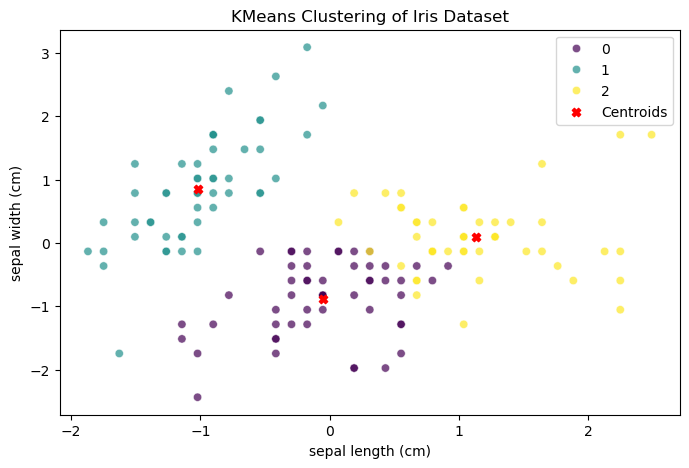

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', label='Centroids')
plt.title("KMeans Clustering of Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

# Hierarchical Clustering is an unsupervised machine learning algorithm that groups data points into a hierarchy of clusters.

# There are two main types:

# Agglomerative (Bottom-Up)
# Each data point starts as its own cluster.
# Iteratively, the two closest clusters are merged based on a distance metric.
# This continues until one single cluster remains or a predefined number of clusters is reached.

# Divisive (Top-Down)
# Starts with one large cluster.
# Splits clusters into smaller groups recursively until each point is its own cluster.

# Hierarchical clustering is a good choice for the Iris dataset due to the following reasons:

# Works Well for Small Datasets
# Dendrogram Provides Better Insights
# No Need to Predefine the Number of Clusters

In [8]:
# Applying Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

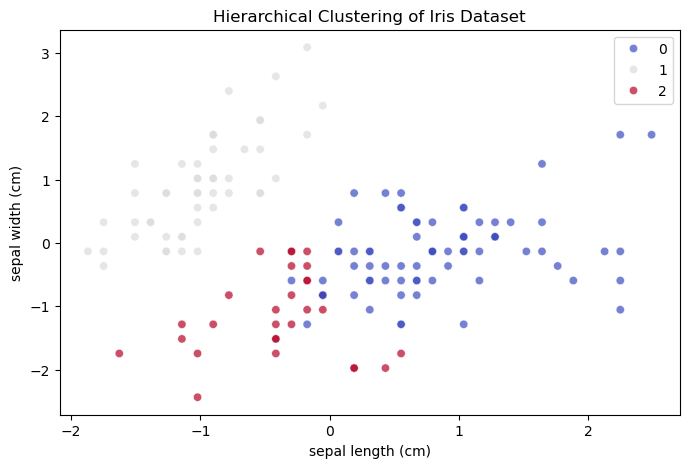

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=hierarchical_labels, palette='coolwarm', alpha=0.7)
plt.title("Hierarchical Clustering of Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

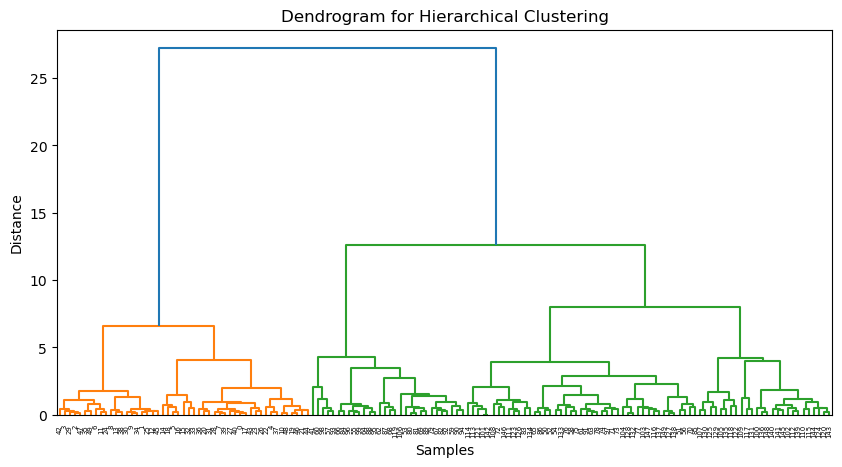

In [10]:
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()